## Research

Dataset from kagle link : 
- https://www.kaggle.com/datasets/kaushiksuresh147/solana-cryptocurrency-historical-dataset

<br>Machine learning for crypto:
- https://www.sciencedirect.com/science/article/pii/S2405918822000174

<br>which model to use :
- https://neptune.ai/blog/arima-vs-prophet-vs-lstm#:~:text=Prophet's%20advantage%20is%20that%20it,are%20only%20a%20special%20case.

- https://watermark.silverchair.com/hhaa009.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAsIwggK-BgkqhkiG9w0BBwagggKvMIICqwIBADCCAqQGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQM6XC8NIwm_V5m_ayoAgEQgIICdZIgytvxFpfrSi3ZLblJf6-m4-A6dzmy7x3ds2YDU2-MzNMwxOdaYGeHzzOPsL4YQgqWjG695wpsEu1TDRzA6xnlZzatyJ4E6iyW2Xc-tGeSbq3n7FwnhvEBRfpm6EvA-LSRJf8o7k2MEbk0Etnq9iXd1_Wgf2zLZufI1QYGvBVsJLtNDhVhbmgvlBY1mLFxAtn0_PiMiiqrG4knCyNlbAcJtd5FqzlQjCDLtwLFYYORWwNWWABkGYtE-QpFSprrXfROp2F2vVCjoSeBMdWKHwt4ZXYm7X_rxtvdesAgka4kcOhT3JpvwQ4L-ES6WLMFAGmfzxZjR9vIp4sH1DXKfshc0vcg12zMW1q165T-7xts2iE7cj3kMx39STIZqYMvILhjOyygg48rZ70EOuYMWhP9EXCHT0C4fa06-PXWeAX8RRsLK1gemfEz4SVc8FF2P9c0GwuvCr9zBMMRNUXzTHqxsGsZGLixQtHjkkaGOGTnFh9vxIIj-oS6N92PF3lZZbU6tfvJbREGa-ho8Rt9cqoD9GJGdNU399Jgz1dIK17lsH9AOV892viDhguFp6uMvAp2xsMtecv8Y-ELrbdI6pG4Tmb1yuvHOvY2LqfRvjFlkOXS145N7gCJEhDT7trjw3jWVucDdResNJFAt7NMq6RjN3gBu7Sg1TMtlbk3Jp9olt3jIX5AVptvUMZ7frtb8WRIF571gp_xqwKoyjgthrmMmP2Rc6PeS1nJfsegdgGcwra8NErgTEW9g7zG5S9ok-c4sBhsp5d7GfUcq8ef-aCZKEe0Rx9CYJRJWDvyKj8Vv7QeGfIh1wqrHzXq8aUWDtfSwqm4

https://www.researchgate.net/publication/357042521_An_On-Chain_Analysis-Based_Approach_to_Predict_Ethereum_Prices

In [172]:
from moralis import sol_api

api_key = "GRqPgfGKgZRxfNLpG7I7VIkU4QxjGb7uw8tQeQm2Ea8VtQJZIL9xH1y6SHcZRbkx"
params = {
    "address": "4k3Dyjzvzp8eMZWUXbBCjEvwSkkk59S5iCNLY3QrkX6R", 
    "network": "mainnet", 
}

result = sol_api.token.get_token_price(
    api_key=api_key,
    params=params,
)

print(result)

{'usdPrice': 0.3305, 'exchangeName': 'Raydium', 'exchangeAddress': '675kPX9MHTjS2zt1qfr1NYHuzeLXfQM9H24wFSUt1Mp8', 'nativePrice': {'value': '14983344', 'symbol': 'WSOL', 'name': 'Wrapped Solana', 'decimals': 9}}


In [178]:
from moralis import evm_api

api_key = "GRqPgfGKgZRxfNLpG7I7VIkU4QxjGb7uw8tQeQm2Ea8VtQJZIL9xH1y6SHcZRbkx"
historicalPrice = []

for to_block in range(1323500, 1323550, 10):
  params = {
    "address": "0xDE9B56f3Bb816f37b4F1b5081058465ed57826A3",
    "chain": "eth",
    "to_block": to_block
  }
  result = evm_api.token.get_token_price(
    api_key=api_key,
    params=params,
  )

  historicalPrice.append(result)

print(historicalPrice)

ApiException: (404)
Reason: Not Found
HTTP response headers: HTTPHeaderDict({'Date': 'Thu, 02 Mar 2023 04:47:16 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '74', 'Connection': 'keep-alive', 'CF-Ray': '7a17002e381ba060-SIN', 'Access-Control-Allow-Origin': '*', 'ETag': 'W/"4a-3GnrbU7UfMO4wITC81VOy6nD+bs"', 'Vary': 'Accept-Encoding', 'CF-Cache-Status': 'DYNAMIC', 'X-Powered-By': 'Express', 'x-request-weight': '3', 'Server': 'cloudflare'})
HTTP response body: b'{"message":"No pools found with enough liquidity, to calculate the price"}'


## Import Libraries

In [1]:
import pyforest
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#from sklearn.model_selection import StratifiedShuffleSplit

## Data Cleaning & EDA

In [2]:
#Read data
df=pd.read_csv("../00-Datasets/Solana Historical Data.csv")
df_new=pd.read_csv("../00-Datasets/Solana Hist-010323.csv")
df_new1=pd.read_csv("../00-Datasets/Sol.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
display(df)
display(df_new1)

Date       Open       High        Low      Close      Volume
0    2020-04-10   0.832005   1.313487   0.694187   0.951054    87364276
1    2020-04-11   0.951054   1.049073   0.765020   0.776819    43862444
2    2020-04-12   0.785448   0.956670   0.762426   0.882507    38736897
3    2020-04-13   0.890760   0.891603   0.773976   0.777832    18211285
4    2020-04-14   0.777832   0.796472   0.628169   0.661925    16747614
..          ...        ...        ...        ...        ...         ...
942  2022-11-08  29.597441  31.060968  21.783983  24.152937  6120104231
943  2022-11-09  24.159435  24.159435  12.505624  13.940857  4647808136
944  2022-11-10  13.985069  18.675638  13.411027  17.681408  4084381465
945  2022-11-11  17.663450  18.136482  15.507472  16.326746  2191908978
946  2022-11-12  16.394768  16.394768  14.931652  15.408513  1723249920

[947 rows x 6 columns]

time  CapMrktEstUSD  ReferenceRate  ReferenceRateBTC  \
0     2020-04-11   6.244288e+06       0.949557          0.000138   
1     2020-04-12   7.247082e+06       0.780536          0.000113   
2     2020-04-13   6.272480e+06       0.905885          0.000130   
3     2020-04-14   5.365157e+06       0.784060          0.000114   
4     2020-04-15   5.126711e+06       0.670645          0.000098   
...          ...            ...            ...               ...   
1050  2023-02-25   8.470942e+09      23.032120          0.000994   
1051  2023-02-26   8.798788e+09      22.392771          0.000967   
1052  2023-02-27   8.581514e+09      23.255261          0.000988   
1053  2023-02-28   8.298939e+09      22.686917          0.000965   
1054  2023-03-01            NaN      21.932019          0.000948   

      ReferenceRateETH  ReferenceRateEUR  ReferenceRateUSD  \
0             0.006027          0.869177          0.949557   
1             0.004927          0.715000          0.780536   
2             0.005639          0.830362          0.905885   
3             0.004988          0.718181          0.784060   
4             0.004218          0.611434          0.670645   
...                ...               ...               ...   
1050          0.014321         21.847463         23.032120   
1051          0.014049         21.263598         22.392771   
1052          0.014175         22.048681         23.255261   
1053          0.013887         21.411043         22.686917   
1054          0.013651         20.759619         21.932019   

      principal_market_price_usd   principal_market_usd  
0                            NaN                    NaN  
1                            NaN                    NaN  
2                            NaN                    NaN  
3                            NaN                    NaN  
4                            NaN                    NaN  
...                          ...                    ...  
1050                       23.07  coinbase-sol-usd-spot  
1051                       22.38  coinbase-sol-usd-spot  
1052                       23.27  coinbase-sol-usd-spot  
1053                       22.66  coinbase-sol-usd-spot  
1054                       21.87  coinbase-sol-usd-spot  

[1055 rows x 9 columns]

In [4]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   time                        1055 non-null   object 
 1   CapMrktEstUSD               1054 non-null   float64
 2   ReferenceRate               1055 non-null   float64
 3   ReferenceRateBTC            1055 non-null   float64
 4   ReferenceRateETH            1055 non-null   float64
 5   ReferenceRateEUR            1055 non-null   float64
 6   ReferenceRateUSD            1055 non-null   float64
 7   principal_market_price_usd  152 non-null    float64
 8   principal_market_usd        152 non-null    object 
dtypes: float64(7), object(2)
memory usage: 74.3+ KB


In [5]:
df.describe()

Open        High         Low       Close        Volume
count  947.000000  947.000000  947.000000  947.000000  9.470000e+02
mean    53.024538   55.563564   50.428408   53.011934  1.157560e+09
std     61.951240   64.555595   59.045152   61.881262  1.518292e+09
min      0.513391    0.559759    0.505194    0.515273  6.520200e+05
25%      2.974140    3.213740    2.749969    3.005711  2.132374e+07
50%     32.748028   33.985237   31.411757   32.757595  6.509978e+08
75%     86.156261   90.725327   82.557888   86.153881  1.788663e+09
max    258.781555  260.062103  246.122421  258.934326  1.706864e+10

In [6]:
display(df.isnull().sum())
display(df_new1.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

time                            0
CapMrktEstUSD                   1
ReferenceRate                   0
ReferenceRateBTC                0
ReferenceRateETH                0
ReferenceRateEUR                0
ReferenceRateUSD                0
principal_market_price_usd    903
principal_market_usd          903
dtype: int64

It seems that the dataset has no null values.

In [7]:
display(df.duplicated().sum())
display(df_new1.duplicated().sum())

0

0

In [8]:
df_new11=df_new1.copy()
df_new1["Date"]=pd.to_datetime(df_new1["time"])
df_new1["Date"].info()
display(df_new1.columns)
#set date as index
df_new1_index_date=df_new1.set_index("Date")
df_new1_index_date.head()

<IPython.core.display.Javascript object>

<class 'pandas.core.series.Series'>
RangeIndex: 1055 entries, 0 to 1054
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
1055 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.4 KB


Index(['time', 'CapMrktEstUSD', 'ReferenceRate', 'ReferenceRateBTC',
       'ReferenceRateETH', 'ReferenceRateEUR', 'ReferenceRateUSD',
       'principal_market_price_usd', 'principal_market_usd', 'Date'],
      dtype='object')

time  CapMrktEstUSD  ReferenceRate  ReferenceRateBTC  \
Date                                                                     
2020-04-11  2020-04-11   6.244288e+06       0.949557          0.000138   
2020-04-12  2020-04-12   7.247082e+06       0.780536          0.000113   
2020-04-13  2020-04-13   6.272480e+06       0.905885          0.000130   
2020-04-14  2020-04-14   5.365157e+06       0.784060          0.000114   
2020-04-15  2020-04-15   5.126711e+06       0.670645          0.000098   

            ReferenceRateETH  ReferenceRateEUR  ReferenceRateUSD  \
Date                                                               
2020-04-11          0.006027          0.869177          0.949557   
2020-04-12          0.004927          0.715000          0.780536   
2020-04-13          0.005639          0.830362          0.905885   
2020-04-14          0.004988          0.718181          0.784060   
2020-04-15          0.004218          0.611434          0.670645   

            principal_market_price_usd principal_market_usd  
Date                                                         
2020-04-11                         NaN                  NaN  
2020-04-12                         NaN                  NaN  
2020-04-13                         NaN                  NaN  
2020-04-14                         NaN                  NaN  
2020-04-15                         NaN                  NaN

In [9]:
#A copy of dataframe is kept for SARIMA as does not support datetime types
df1=df.copy()
#Convert to date Dtype from object to datetime64 object
df["Date"]=pd.to_datetime(df["Date"])
df["Date"].info()

<IPython.core.display.Javascript object>

<class 'pandas.core.series.Series'>
RangeIndex: 947 entries, 0 to 946
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
947 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.5 KB


<IPython.core.display.Javascript object>

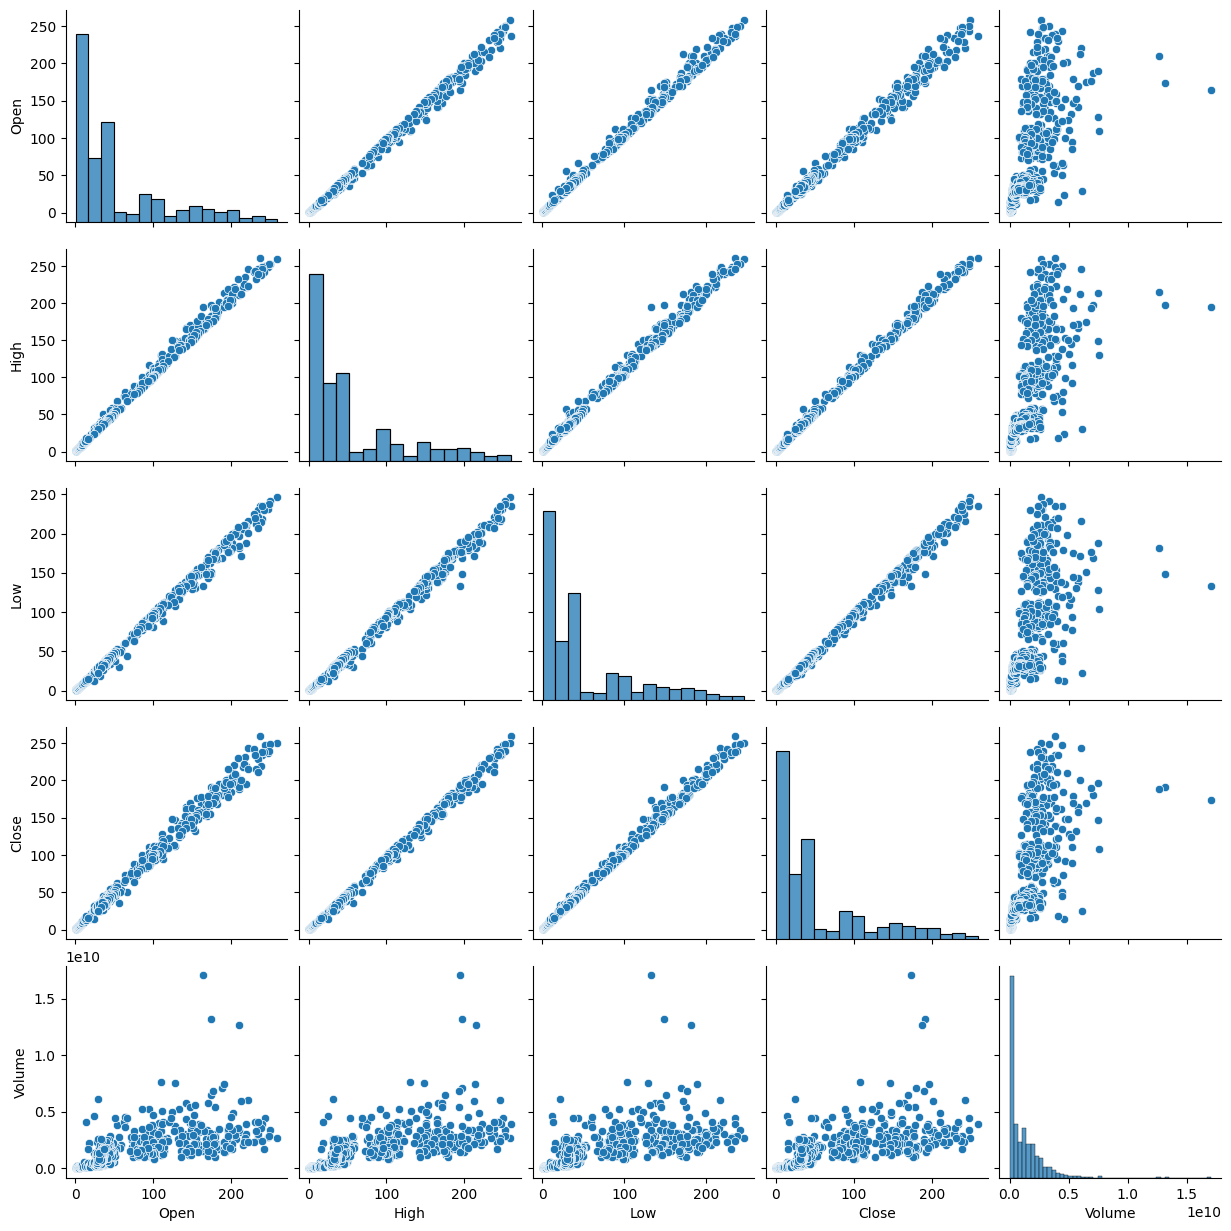

In [10]:
sns.pairplot(df)

Based on the distribution plot in the centre, the data is right-skewed distribution.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/var/folders/b2/1_py_fv17p173bxx_hhg8qdc0000gn/T/ipykernel_78822/99567915.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(df.corr()))


<IPython.core.display.Javascript object>

/var/folders/b2/1_py_fv17p173bxx_hhg8qdc0000gn/T/ipykernel_78822/99567915.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_heatmap=sns.heatmap(df.corr(),


<IPython.core.display.Javascript object>

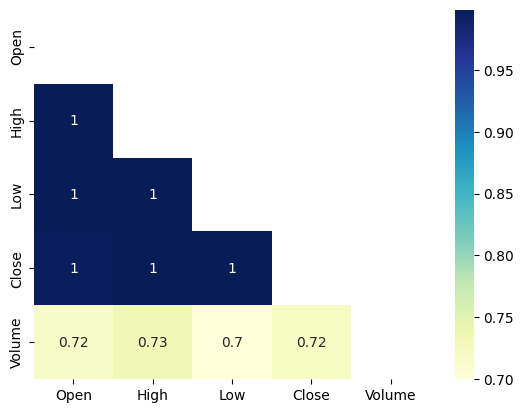

In [11]:
#Triangle correlation Heatmap

#Create mask
mask=np.triu(np.ones_like(df.corr()))

#Plot triangle correlation heatmap
df_heatmap=sns.heatmap(df.corr(),
                       cmap="YlGnBu",
                      annot=True,
                      mask=mask,)

# displaying heatmap
plt.show()

In [12]:
df.head()

Date      Open      High       Low     Close    Volume
0 2020-04-10  0.832005  1.313487  0.694187  0.951054  87364276
1 2020-04-11  0.951054  1.049073  0.765020  0.776819  43862444
2 2020-04-12  0.785448  0.956670  0.762426  0.882507  38736897
3 2020-04-13  0.890760  0.891603  0.773976  0.777832  18211285
4 2020-04-14  0.777832  0.796472  0.628169  0.661925  16747614

In [13]:
#set date as index
df_index_date=df.set_index("Date")
df_index_date.head()

Open      High       Low     Close    Volume
Date                                                        
2020-04-10  0.832005  1.313487  0.694187  0.951054  87364276
2020-04-11  0.951054  1.049073  0.765020  0.776819  43862444
2020-04-12  0.785448  0.956670  0.762426  0.882507  38736897
2020-04-13  0.890760  0.891603  0.773976  0.777832  18211285
2020-04-14  0.777832  0.796472  0.628169  0.661925  16747614

In [14]:
#Basic trading visualisation

#Solana visualisation
fig = go.Figure(data=[go.Candlestick(x=df_index_date.index, 
                                     open=df['Open'], 
                                     high=df['High'], 
                                     low=df['Low'], 
                                     close=df['Close'])])

#Label of visualisation
fig.update_layout(
    title='Solana Cryptocurrency',
    yaxis_title='Solana price (USD)')

#Show figure
fig.show()

The top visualisation is done to get a feel of the solana price chart before further analysis are made.

In [15]:
'''
look at time lag betwen consecutive entries

we start with 1 instead of 0 since there's nothing to compare the first entry to
'''
(df_index_date.index[1:]-df_index_date.index[:-1]).value_counts().head()

1 days    946
Name: Date, dtype: int64

This means that there is no gaps in our dataset.

In [16]:
#Plot line plot
lineplot_fig=px.line(df_index_date,
                     x=df_index_date.index,
                     y="Close",
                     title="Evolution of Solana price (USD) in line plot"
                     ,log_x=False,log_y=False)

#Label of visualisation
lineplot_fig.update_layout(yaxis_title='Solana closing price (USD)')

#Show figure
lineplot_fig.show()

<IPython.core.display.Javascript object>

In [17]:
#Show distribution and outlier

dis_fig = px.histogram(df_index_date, x=df.index, y="Close",
                       marginal="box", # or violin, rug
                       hover_data=df_index_date.columns,
                       title="Histogram & Boxplot of closing prices for Solana")

#Label of visualisation
dis_fig.update_layout(yaxis_title='Frequency',xaxis_title='Days from the start of Solana to present')

dis_fig.show()

<IPython.core.display.Javascript object>

The distribution seems slightly right skewed. Let do the boxplot by year.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

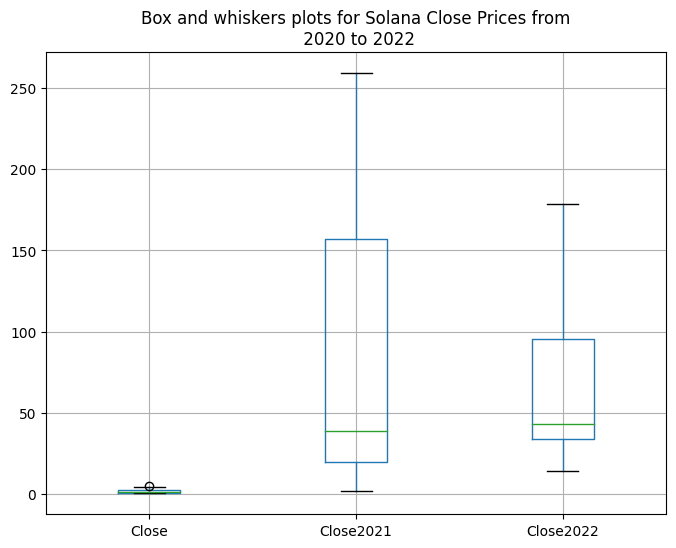

In [18]:
#Boxplot by year

groups = df_index_date.groupby(pd.Grouper(freq='A')) # group by year

years = pd.DataFrame([])

for name, group in groups: # iterate through the years
    tmp = group.groupby(pd.Grouper(freq='D')).Close.mean() # compute the daily mean
    tmp.index = tmp.index.strftime('%m-%d') # transform the index into 'mm-dd' only
    
    years = years.join(tmp, rsuffix=name.year, how = "outer") # join together yearly series (on the 'mm-dd' index) 
    
years.boxplot(figsize=(8,6))

plt.title('Box and whiskers plots for Solana Close Prices from\n 2020 to 2022');


In [19]:
#https://python.plainenglish.io/interactive-calendar-heatmaps-with-plotly-the-easieast-way-youll-find-5fc322125db7
#https://www.analyticsvidhya.com/blog/2021/02/visualization-in-time-series-using-heatmaps-in-python/
from plotly_calplot import calplot

time_heatmap=calplot(df,x="Date",y="Close",
                     title="Yearly Calander Heatmap for Solana Prices",
                     month_lines_width=5,gap=0.9,
                     years_title=True,
                     space_between_plots=0.08,
                     showscale=True)

time_heatmap.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

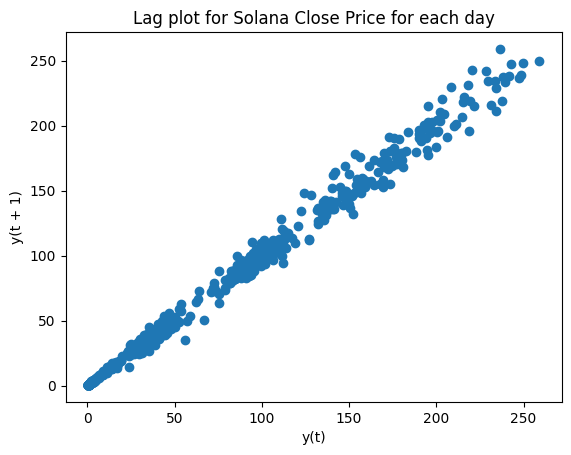

In [20]:
from pandas.plotting import lag_plot

lag_plot(df_index_date.groupby(pd.Grouper(freq='D')).Close.mean())
plt.title("Lag plot for Solana Close Price for each day")
plt.show()

We see a strong positive relation between Close price at t and Close price at t+1.

Let's experiment with the lag value.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

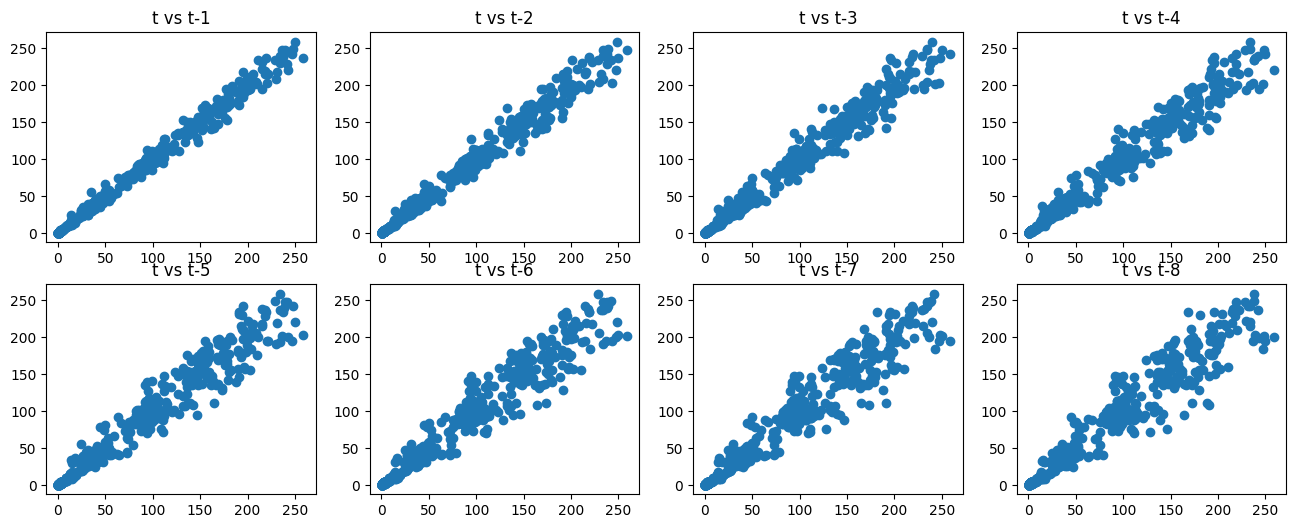

In [21]:
daily_df =df_index_date.groupby(pd.Grouper(freq='D')).Close.mean()
daily_values = pd.DataFrame(daily_df.values)

lags = 8
columns = [daily_values]

for i in range(1,(lags + 1)):
    columns.append(daily_values.shift(i)) # downward shift by i positions

dataframe = pd.concat(columns, axis=1)

col_names = ['t'] + ['t-'+str(l) for l in range(1,(lags + 1))]

dataframe.columns = col_names

plt.figure(figsize=(16,6))

for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)

plt.show()

Observations: the price at t correlates quite strongly with the price at previous time points (from t-1 to t-8), for lower price values (approximately half of maximum price). Beyond this value, the correlation becomes weaker the more we go back in time.

We know from the first line plot we looked at that solana price surged in 2021. Also, common knowledge of crypto assets market says that prices get very volatile when there is a lot of hype and more people get into the market. So, when prices are high, we expect a lot of volatility (more abrupt and erratic price changes across days). This is what the plots above tell us too.

So, what we conclude: there's a strong positive relationship with prices on previous days, but not so much when the market becomes hyped and volatile.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

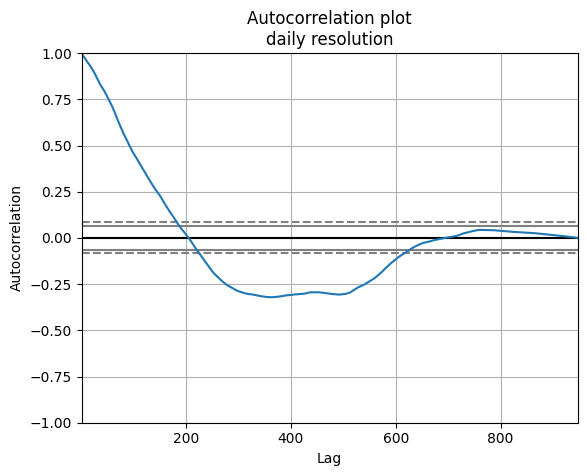

In [22]:
'''
Autocorrelation plots
- To quantify the relationship between the price and the actual lag value
- Where:
 1 (strongest negative correlation)
 0 (no relationshop at all)
 1 (strongest positive correlation)
'''
from pandas.plotting import autocorrelation_plot

sol_days_df = df_index_date.groupby(pd.Grouper(freq='D')).Close.mean()

autocorrelation_plot(sol_days_df)

plt.title('Autocorrelation plot\ndaily resolution')
plt.show()

We see a statistically significant correlation with up tp 200-ish previous days average prices. The more we go back in time, the lower the correlation, until it starts to become slightly negative (statistically significant).

We know markets have a global evolution (bull / bear market) and local trends (short term excitement for the price of an asset and then slight corrections).

So, depending on the time resolution our data has, I expect the autocorrelation plot to capture the underlying long or short term trend.

#### Power transforms

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

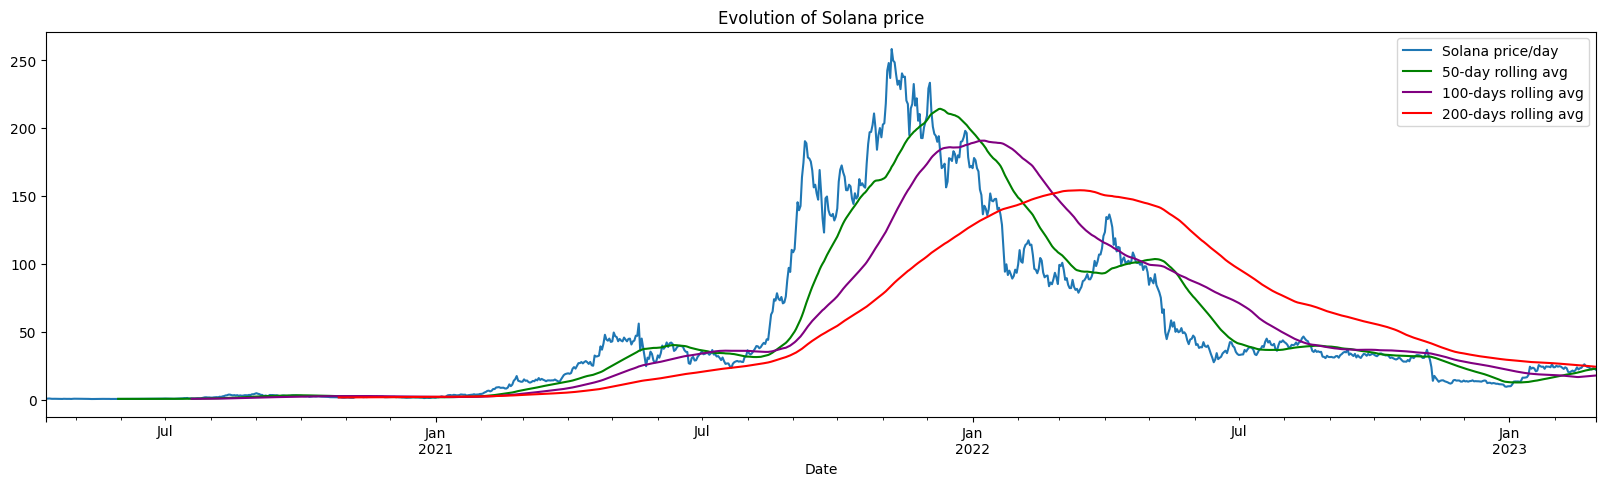

In [23]:
#Linear plot with moving average

#Create the different types of moving average
fifty_days=50
hund_days = 100
twohun_dayz = 200

#df_index_date.Close.plot(figsize=(20,5))
df_new1_index_date.ReferenceRateUSD.plot(figsize=(20,5))

# tail-rolling average transform
rolling_f = df_new1_index_date.ReferenceRateUSD.rolling(window=fifty_days)
rolling_f_mean = rolling_f.mean()
rolling_f_mean.plot(color='green')

rolling_m = df_new1_index_date.ReferenceRateUSD.rolling(window=hund_days)
rolling_m_mean = rolling_m.mean()
rolling_m_mean.plot(color='purple')

rolling_y = df_new1_index_date.ReferenceRateUSD.rolling(window=twohun_dayz)
rolling_y_mean = rolling_y.mean()
rolling_y_mean.plot(color='red')


# # tail-rolling average transform
# rolling_f = df_index_date.Close.rolling(window=fifteen_days)
# rolling_f_mean = rolling_f.mean()
# rolling_f_mean.plot(color='green')

# rolling_m = df_index_date.Close.rolling(window=month_sz)
# rolling_m_mean = rolling_m.mean()
# rolling_m_mean.plot(color='purple')

# rolling_y = df_index_date.Close.rolling(window=year_sz)
# rolling_y_mean = rolling_y.mean()
# rolling_y_mean.plot(color='red')

plt.legend(['Solana price/day','50-day rolling avg', '100-days rolling avg', '200-days rolling avg'])
plt.title('Evolution of Solana price')
plt.show()

#### Square root
Square root helps bring the data into a linear trend and well-behaved distribution (i.e. Gaussian, uniform) when the data is quadratic.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

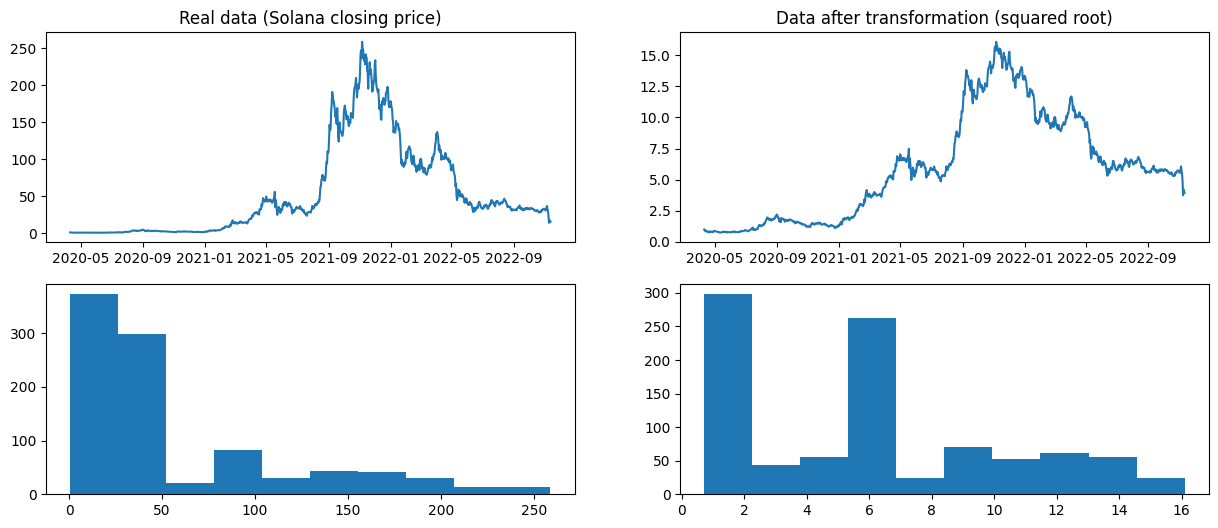

In [24]:
data = df_index_date.Close
plt.figure(figsize=(15,6))

## quadratic data plots
# line plot
plt.subplot(221)
plt.plot(data)
plt.title('Real data (Solana closing price)')

# histogram
plt.subplot(223)
plt.hist(data)

## square root data plots
# linear plots
sq_data = np.sqrt(data)
plt.subplot(222)
plt.plot(sq_data)
plt.title('Data after transformation (squared root)')

# histogram
plt.subplot(224)
plt.hist(sq_data)

plt.show()

Our dataset is not quadratic.

#### Log transform
Log transforms help when the data has an exponential trend, which is often likened to a hokey stick in asset price popular terminology.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

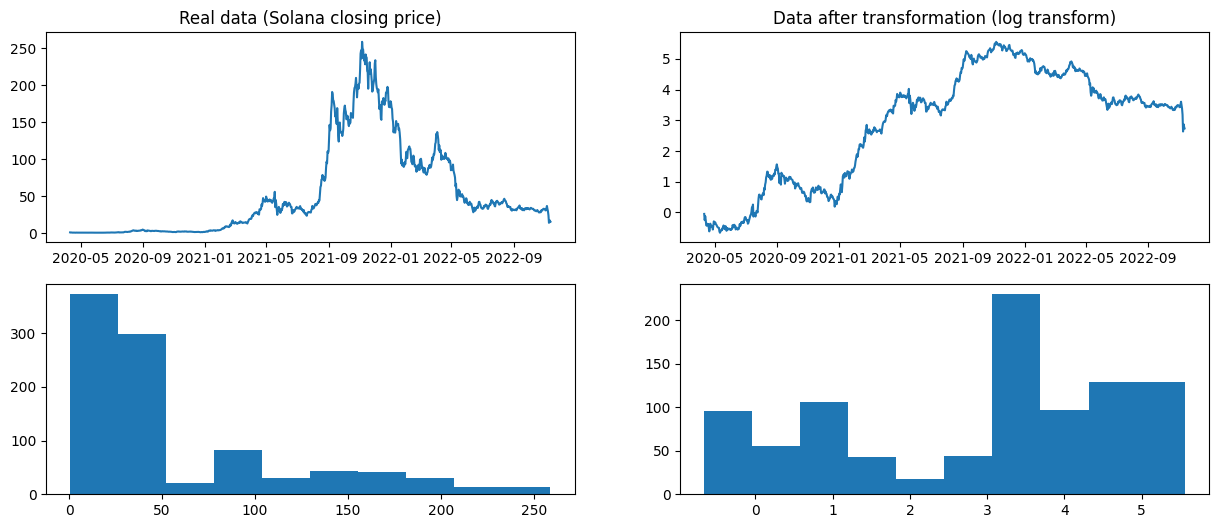

In [25]:
data_log = df_index_date.Close
plt.figure(figsize=(15,6))

## initial data plots
# line plot
plt.subplot(221)
plt.plot(data_log)
plt.title('Real data (Solana closing price)')

# histogram
plt.subplot(223)
plt.hist(data_log)

## square root data plots
# linear plots
sq_data_log = np.log(data_log)
plt.subplot(222)
plt.plot(sq_data_log)
plt.title('Data after transformation (log transform)')

# histogram
plt.subplot(224)
plt.hist(sq_data_log)

plt.show()

Our dataset is not log transforms.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

best lambda: 0.1792932805053293


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

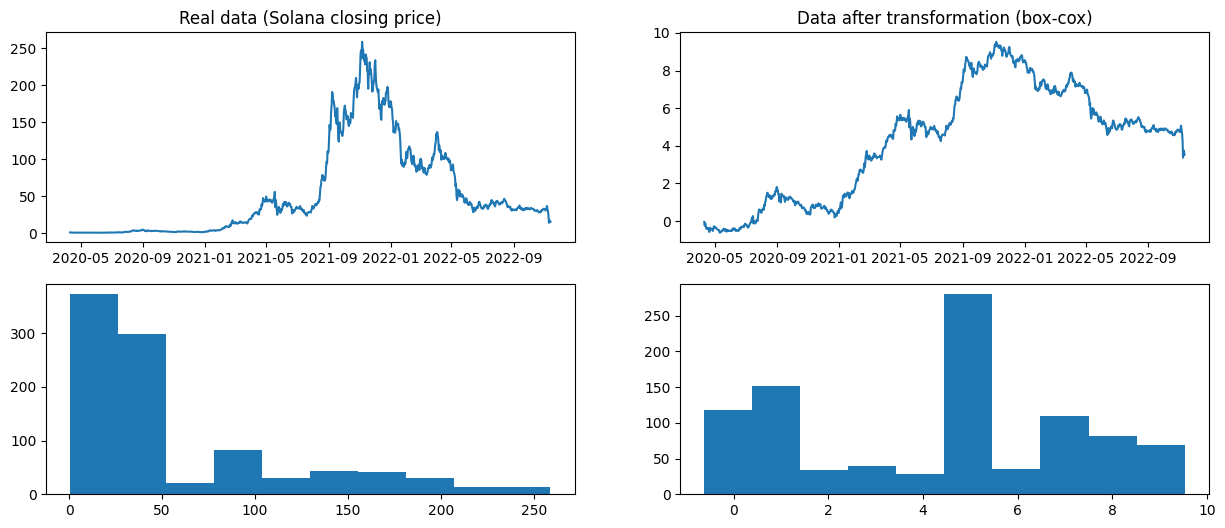

In [26]:
# using automatically box-cox transform a time series
#https://builtin.com/data-science/box-cox-transformation-target-variable
from scipy.stats import boxcox

plt.figure(figsize=(15,6))

## initial data plots
# line plot
plt.subplot(221)
plt.plot(data)
plt.title('Real data (Solana closing price)')

# histogram
plt.subplot(223)
plt.hist(data)

## transformed data plots
temp_df = pd.DataFrame(df_index_date.Close)
temp_df.columns = ['Close']

temp_df['Close'], lambda_val = boxcox(temp_df['Close'])
print(f'best lambda: {lambda_val}')

# line plot
plt.subplot(222)
plt.title('Data after transformation (box-cox)')
plt.plot(temp_df['Close'])

# histogram
plt.subplot(224)
plt.hist(temp_df['Close'])
plt.show()

Best Lambda is 0.17929. However it is not standard distribution. Our dataset is not box-cox.

## Model 1 : SARIMA

### ARIMA assumptions
- No Irregularity. Eg. No irregular events like COVID-19 that affect our data
- ARIMA is naive model for non-seasonal data which means that different seasons do not affect its values. When there exists seasonality, use Seasonal ARIMA (SARIMA) model.
- Data should be stationary
- Data should be univariate

In [27]:
#choose the variable for Sarima
df_sarima1=df_new1[["time","ReferenceRateUSD"]]

#Rename
df_sarima1=df_sarima1.rename(columns={'time':'ds', 'ReferenceRateUSD':'y'})
df_sarima1.dtypes

ds     object
y     float64
dtype: object

#choose the variable for Sarima
df_sarima=df1[["Date","Close"]]
df_sarima

#Rename
df_sarima=df_sarima.rename(columns={'Date':'ds', 'Close':'y'})
df_sarima

df_sarima["ds"].astype(str)
df_sarima.dtypes

In [29]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

In [30]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
simple_pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]

print('Parameter combinations for Seasonal ARIMA...')

for param in simple_pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_sarima1['y'],
                                            order=param,
                                            )

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Parameter combinations for Seasonal ARIMA...


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76803D+00    |proj g|=  1.59872D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.599D-09   5.768D+00
  F =   5.7680278373019362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:12172.538736707085


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76803D+00    |proj g|=  1.59872D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.599D-09   5.768D+00
  F =   5.7680278373019362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:12172.538736707085


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76803D+00    |proj g|=  1.59872D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.599D-09   5.768D+00
  F =   5.7680278373019362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:12172.538736707085


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76803D+00    |proj g|=  1.59872D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.599D-09   5.768D+00
  F =   5.7680278373019362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:12172.538736707085


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76803D+00    |proj g|=  1.59872D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.599D-09   5.768D+00
  F =   5.7680278373019362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:12172.538736707085


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76803D+00    |proj g|=  1.59872D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.599D-09   5.768D+00
  F =   5.7680278373019362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:12172.538736707085


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76803D+00    |proj g|=  1.59872D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.599D-09   5.768D+00
  F =   5.7680278373019362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:12172.538736707085


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76803D+00    |proj g|=  1.59872D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.599D-09   5.768D+00
  F =   5.7680278373019362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:12172.538736707085


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76803D+00    |proj g|=  9.98090D-01

At iterate    5    f=  5.39710D+00    |proj g|=  9.38482D-03

At iterate   10    f=  5.15853D+00    |proj g|=  5.04740D-04

At iterate   15    f=  5.12305D+00    |proj g|=  4.00658D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     36      1     0     0   1.546D-06   5.118D+00
  F =   5.1177937398496471     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0,

 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76803D+00    |proj g|=  9.98090D-01

At iterate    5    f=  5.39710D+00    |proj g|=  9.38482D-03


 This problem is unconstrained.



At iterate   10    f=  5.15853D+00    |proj g|=  5.04740D-04

At iterate   15    f=  5.12305D+00    |proj g|=  4.00658D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     36      1     0     0   1.546D-06   5.118D+00
  F =   5.1177937398496471     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:10802.544791082755


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76803D+00    |proj g|=  9.98090D-01


 This problem is unconstrained.



At iterate    5    f=  5.39710D+00    |proj g|=  9.38482D-03

At iterate   10    f=  5.15853D+00    |proj g|=  5.04740D-04

At iterate   15    f=  5.12305D+00    |proj g|=  4.00658D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     36      1     0     0   1.546D-06   5.118D+00
  F =   5.1177937398496471     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:10802.544791082755


<IPython.core.display.Javascript object>

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76803D+00    |proj g|=  9.98090D-01

At iterate    5    f=  5.39710D+00    |proj g|=  9.38482D-03

At iterate   10    f=  5.15853D+00    |proj g|=  5.04740D-04

At iterate   15    f=  5.12305D+00    |proj g|=  4.00658D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     36      1     0     0   1.546D-06   5.118D+00
  F =   5.1177937398496471     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0,

<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76803D+00    |proj g|=  9.98090D-01

At iterate    5    f=  5.39710D+00    |proj g|=  9.38482D-03


 This problem is unconstrained.



At iterate   10    f=  5.15853D+00    |proj g|=  5.04740D-04

At iterate   15    f=  5.12305D+00    |proj g|=  4.00658D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     36      1     0     0   1.546D-06   5.118D+00
  F =   5.1177937398496471     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:10802.544791082755


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76803D+00    |proj g|=  9.98090D-01

At iterate    5    f=  5.39710D+00    |proj g|=  9.38482D-03


 This problem is unconstrained.



At iterate   10    f=  5.15853D+00    |proj g|=  5.04740D-04

At iterate   15    f=  5.12305D+00    |proj g|=  4.00658D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     36      1     0     0   1.546D-06   5.118D+00
  F =   5.1177937398496471     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:10802.544791082755


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76803D+00    |proj g|=  9.98090D-01


 This problem is unconstrained.



At iterate    5    f=  5.39710D+00    |proj g|=  9.38482D-03

At iterate   10    f=  5.15853D+00    |proj g|=  5.04740D-04

At iterate   15    f=  5.12305D+00    |proj g|=  4.00658D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     36      1     0     0   1.546D-06   5.118D+00
  F =   5.1177937398496471     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:10802.544791082755


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76803D+00    |proj g|=  9.98090D-01

At iterate    5    f=  5.39710D+00    |proj g|=  9.38482D-03

At iterate   10    f=  5.15853D+00    |proj g|=  5.04740D-04


 This problem is unconstrained.



At iterate   15    f=  5.12305D+00    |proj g|=  4.00658D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     36      1     0     0   1.546D-06   5.118D+00
  F =   5.1177937398496471     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:10802.544791082755


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91993D+00    |proj g|=  2.10310D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   1.790D-08   2.920D+00
  F =   2.9199263384102259     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:6163.044574045576


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds



 This problem is unconstrained.


At iterate    0    f=  2.91993D+00    |proj g|=  2.10310D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   1.790D-08   2.920D+00
  F =   2.9199263384102259     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:6163.044574045576


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91993D+00    |proj g|=  2.10310D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   1.790D-08   2.920D+00
  F =   2.9199263384102259     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:6163.044574045576


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91993D+00    |proj g|=  2.10310D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   1.790D-08   2.920D+00
  F =   2.9199263384102259     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:6163.044574045576


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91993D+00    |proj g|=  2.10310D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   1.790D-08   2.920D+00
  F =   2.9199263384102259     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:6163.044574045576


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91993D+00    |proj g|=  2.10310D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   1.790D-08   2.920D+00
  F =   2.9199263384102259     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6163.044574045576


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91993D+00    |proj g|=  2.10310D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   1.790D-08   2.920D+00
  F =   2.9199263384102259     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:6163.044574045576


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91993D+00    |proj g|=  2.10310D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   1.790D-08   2.920D+00
  F =   2.9199263384102259     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6163.044574045576


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91923D+00    |proj g|=  8.49512D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   9.552D-06   2.919D+00
  F =   2.9192259841776553     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:6163.566826614853


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91923D+00    |proj g|=  8.49512D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   9.552D-06   2.919D+00
  F =   2.9192259841776553     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:6163.566826614853


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91923D+00    |proj g|=  8.49512D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   9.552D-06   2.919D+00
  F =   2.9192259841776553     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:6163.566826614853


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91923D+00    |proj g|=  8.49512D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   9.552D-06   2.919D+00
  F =   2.9192259841776553     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:6163.566826614853


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91923D+00    |proj g|=  8.49512D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   9.552D-06   2.919D+00
  F =   2.9192259841776553     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:6163.566826614853


 This problem is unconstrained.


<IPython.core.display.Javascript object>

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91923D+00    |proj g|=  8.49512D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   9.552D-06   2.919D+00
  F =   2.9192259841776553     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:6163.566826614853


<IPython.core.display.Javascript object>

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91923D+00    |proj g|=  8.49512D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   9.552D-06   2.919D+00
  F =   2.9192259841776553     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:6163.566826614853


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91923D+00    |proj g|=  8.49512D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   9.552D-06   2.919D+00
  F =   2.9192259841776553     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:6163.566826614853


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92453D+00    |proj g|=  2.11252D-04


 This problem is unconstrained.



At iterate    5    f=  2.92452D+00    |proj g|=  1.19153D-03

At iterate   10    f=  2.92443D+00    |proj g|=  2.75118D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     13      1     0     0   2.751D-06   2.924D+00
  F =   2.9244331270374042     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:6174.553898048923


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92453D+00    |proj g|=  2.11252D-04

At iterate    5    f=  2.92452D+00    |proj g|=  1.19153D-03

At iterate   10    f=  2.92443D+00    |proj g|=  2.75118D-06


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     13      1     0     0   2.751D-06   2.924D+00
  F =   2.9244331270374042     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:6174.553898048923


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92453D+00    |proj g|=  2.11252D-04


 This problem is unconstrained.



At iterate    5    f=  2.92452D+00    |proj g|=  1.19153D-03

At iterate   10    f=  2.92443D+00    |proj g|=  2.75118D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     13      1     0     0   2.751D-06   2.924D+00
  F =   2.9244331270374042     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:6174.553898048923


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds



 This problem is unconstrained.


At iterate    0    f=  2.92453D+00    |proj g|=  2.11252D-04

At iterate    5    f=  2.92452D+00    |proj g|=  1.19153D-03

At iterate   10    f=  2.92443D+00    |proj g|=  2.75118D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     13      1     0     0   2.751D-06   2.924D+00
  F =   2.9244331270374042     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:6174.553898048923


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92453D+00    |proj g|=  2.11252D-04

At iterate    5    f=  2.92452D+00    |proj g|=  1.19153D-03

At iterate   10    f=  2.92443D+00    |proj g|=  2.75118D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     13      1     0     0   2.751D-06   2.924D+00
  F =   2.9244331270374042     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:6174.553898048923


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92453D+00    |proj g|=  2.11252D-04

At iterate    5    f=  2.92452D+00    |proj g|=  1.19153D-03

At iterate   10    f=  2.92443D+00    |proj g|=  2.75118D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     13      1     0     0   2.751D-06   2.924D+00
  F =   2.9244331270374042     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:6174.553898048923


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92453D+00    |proj g|=  2.11252D-04


 This problem is unconstrained.



At iterate    5    f=  2.92452D+00    |proj g|=  1.19153D-03

At iterate   10    f=  2.92443D+00    |proj g|=  2.75118D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     13      1     0     0   2.751D-06   2.924D+00
  F =   2.9244331270374042     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:6174.553898048923


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92453D+00    |proj g|=  2.11252D-04

At iterate    5    f=  2.92452D+00    |proj g|=  1.19153D-03

At iterate   10    f=  2.92443D+00    |proj g|=  2.75118D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     13      1     0     0   2.751D-06   2.924D+00
  F =   2.9244331270374042     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:6174.553898048923


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92380D+00    |proj g|=  2.05178D-03

At iterate    5    f=  2.92379D+00    |proj g|=  7.43079D-05


 This problem is unconstrained.



At iterate   10    f=  2.92379D+00    |proj g|=  1.88140D-03

At iterate   15    f=  2.92372D+00    |proj g|=  5.42177D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   2.350D-06   2.924D+00
  F =   2.9237061056037037     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:6175.019882823814


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92380D+00    |proj g|=  2.05178D-03


 This problem is unconstrained.



At iterate    5    f=  2.92379D+00    |proj g|=  7.43079D-05

At iterate   10    f=  2.92379D+00    |proj g|=  1.88140D-03

At iterate   15    f=  2.92372D+00    |proj g|=  5.42177D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   2.350D-06   2.924D+00
  F =   2.9237061056037037     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:6175.019882823814


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92380D+00    |proj g|=  2.05178D-03

At iterate    5    f=  2.92379D+00    |proj g|=  7.43079D-05

At iterate   10    f=  2.92379D+00    |proj g|=  1.88140D-03


 This problem is unconstrained.



At iterate   15    f=  2.92372D+00    |proj g|=  5.42177D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   2.350D-06   2.924D+00
  F =   2.9237061056037037     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:6175.019882823814


<IPython.core.display.Javascript object>

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92380D+00    |proj g|=  2.05178D-03

At iterate    5    f=  2.92379D+00    |proj g|=  7.43079D-05

At iterate   10    f=  2.92379D+00    |proj g|=  1.88140D-03

At iterate   15    f=  2.92372D+00    |proj g|=  5.42177D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   2.350D-06   2.924D+00
  F =   2.9237061056037037     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1,

<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92380D+00    |proj g|=  2.05178D-03

At iterate    5    f=  2.92379D+00    |proj g|=  7.43079D-05

At iterate   10    f=  2.92379D+00    |proj g|=  1.88140D-03

At iterate   15    f=  2.92372D+00    |proj g|=  5.42177D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   2.350D-06   2.924D+00
  F =   2.9237061056037037     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:6175.019882823814


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92380D+00    |proj g|=  2.05178D-03

At iterate    5    f=  2.92379D+00    |proj g|=  7.43079D-05


 This problem is unconstrained.



At iterate   10    f=  2.92379D+00    |proj g|=  1.88140D-03

At iterate   15    f=  2.92372D+00    |proj g|=  5.42177D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   2.350D-06   2.924D+00
  F =   2.9237061056037037     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:6175.019882823814


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92380D+00    |proj g|=  2.05178D-03

At iterate    5    f=  2.92379D+00    |proj g|=  7.43079D-05

At iterate   10    f=  2.92379D+00    |proj g|=  1.88140D-03

At iterate   15    f=  2.92372D+00    |proj g|=  5.42177D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   2.350D-06   2.924D+00
  F =   2.9237061056037037     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:6175.019882823814


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.92380D+00    |proj g|=  2.05178D-03

At iterate    5    f=  2.92379D+00    |proj g|=  7.43079D-05

At iterate   10    f=  2.92379D+00    |proj g|=  1.88140D-03

At iterate   15    f=  2.92372D+00    |proj g|=  5.42177D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   2.350D-06   2.924D+00
  F =   2.9237061056037037     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:6175.019882823814


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91919D+00    |proj g|=  2.10957D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   5.958D-06   2.919D+00
  F =   2.9191853033422337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:6163.480990052113


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91919D+00    |proj g|=  2.10957D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   5.958D-06   2.919D+00
  F =   2.9191853033422337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:6163.480990052113

 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91919D+00    |proj g|=  2.10957D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   5.958D-06   2.919D+00
  F =   2.9191853033422337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:6163.480990052113


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91919D+00    |proj g|=  2.10957D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   5.958D-06   2.919D+00
  F =   2.9191853033422337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:6163.480990052113


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91919D+00    |proj g|=  2.10957D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   5.958D-06   2.919D+00
  F =   2.9191853033422337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:6163.480990052113


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91919D+00    |proj g|=  2.10957D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   5.958D-06   2.919D+00
  F =   2.9191853033422337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:6163.480990052113


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91919D+00    |proj g|=  2.10957D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:6163.480990052113
   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   5.958D-06   2.919D+00
  F =   2.9191853033422337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<IPython.core.display.Javascript object>

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91919D+00    |proj g|=  2.10957D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   5.958D-06   2.919D+00
  F =   2.9191853033422337     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:6163.480990052113


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91846D+00    |proj g|=  1.50462D-03

At iterate    5    f=  2.91845D+00    |proj g|=  1.85172D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   2.629D-05   2.918D+00
  F =   2.9184545514112701     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:6163.93910347778


 This problem is unconstrained.


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91846D+00    |proj g|=  1.50462D-03

At iterate    5    f=  2.91845D+00    |proj g|=  1.85172D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F


 This problem is unconstrained.


    3      6      8      1     0     0   2.629D-05   2.918D+00
  F =   2.9184545514112701     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:6163.93910347778


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91846D+00    |proj g|=  1.50462D-03



 This problem is unconstrained.


At iterate    5    f=  2.91845D+00    |proj g|=  1.85172D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   2.629D-05   2.918D+00
  F =   2.9184545514112701     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:6163.93910347778


<IPython.core.display.Javascript object>

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91846D+00    |proj g|=  1.50462D-03

At iterate    5    f=  2.91845D+00    |proj g|=  1.85172D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   2.629D-05   2.918D+00
  F =   2.9184545514112701     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:6163.93910347778


<IPython.core.display.Javascript object>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91846D+00    |proj g|=  1.50462D-03

At iterate    5    f=  2.91845D+00    |proj g|=  1.85172D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   2.629D-05   2.918D+00
  F =   2.9184545514112701     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:6163.93910347778


<IPython.core.display.Javascript object>

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91846D+00    |proj g|=  1.50462D-03

At iterate    5    f=  2.91845D+00    |proj g|=  1.85172D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   2.629D-05   2.918D+00
  F =   2.9184545514112701     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:6163.93910347778


<IPython.core.display.Javascript object>

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91846D+00    |proj g|=  1.50462D-03

At iterate    5    f=  2.91845D+00    |proj g|=  1.85172D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   2.629D-05   2.918D+00
  F =   2.9184545514112701     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:6163.93910347778


<IPython.core.display.Javascript object>

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91846D+00    |proj g|=  1.50462D-03

At iterate    5    f=  2.91845D+00    |proj g|=  1.85172D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   2.629D-05   2.918D+00
  F =   2.9184545514112701     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:6163.93910347778


In [31]:
# in the “mod = sm.tsa.statespace.SARIMAX” command we need to set up the chosen combination.
#Choose the order and season numbers from the above. We need to choose the low AIC as low is better
sarimax_best_model = SARIMAX(df_sarima1["y"], order=(1, 1, 1), seasonal_order=(0, 0, 0, 12)).fit()

print(sarimax_best_model.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91846D+00    |proj g|=  1.50462D-03

At iterate    5    f=  2.91845D+00    |proj g|=  1.85172D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   2.629D-05   2.918D+00
  F =   2.9184545514112701     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observati

<IPython.core.display.Javascript object>

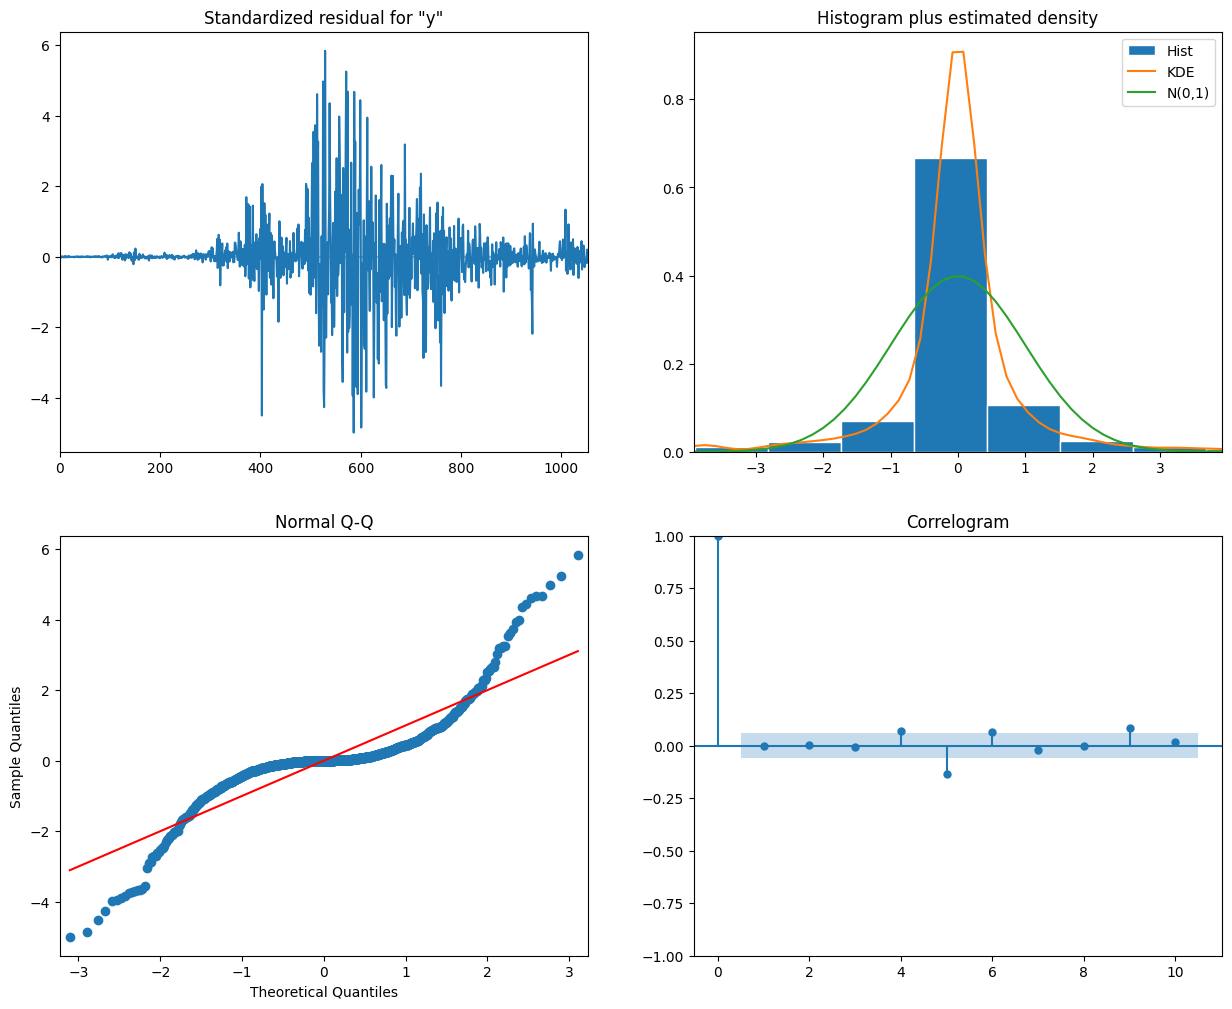

In [32]:
sarimax_best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

### ARIMA Forecast

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

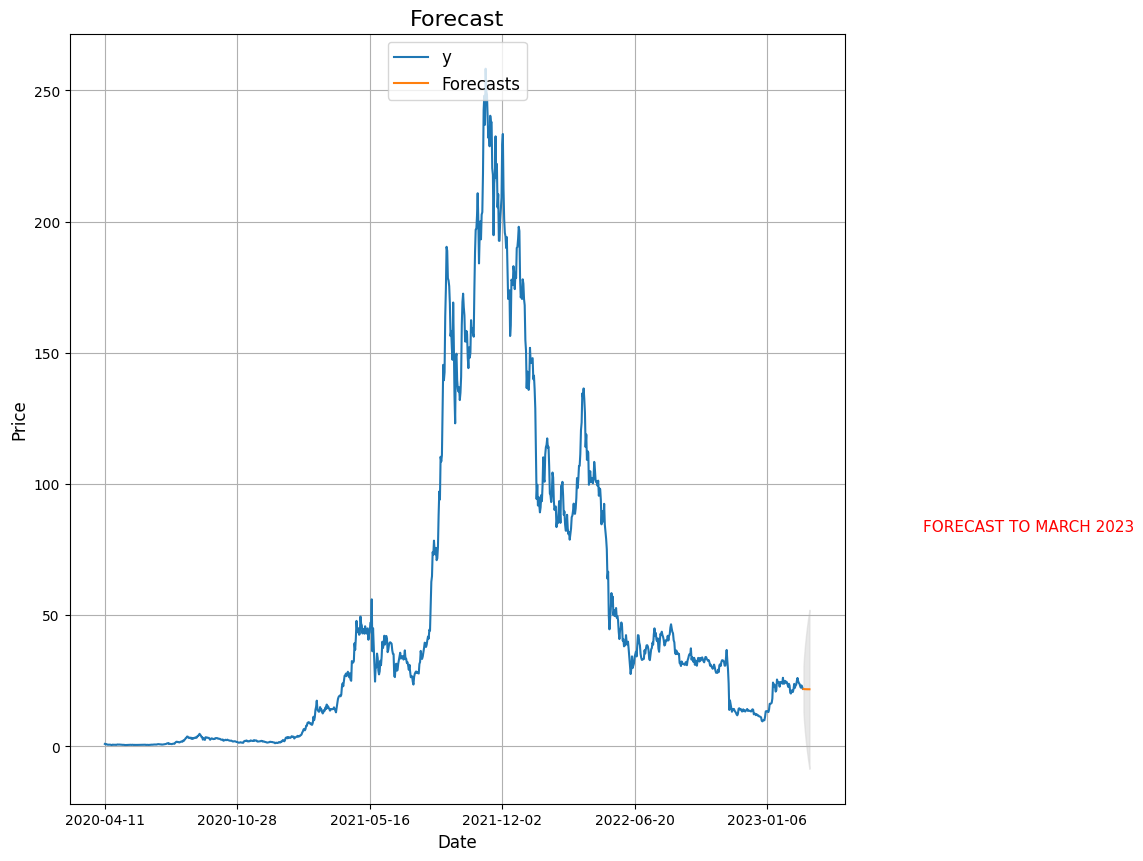

In [201]:
#Forecasting 1 months ahead
#steps is depends on the values that you choose if you choose months, it will be in months, if years, it will be in years
sarimax_forecast_values = sarimax_best_model.get_forecast(steps = 10)

#Confidence intervals of the forecasted values
sarimax_forecast_ci = sarimax_forecast_values.conf_int()

#Plot the data
ax = df_sarima1.plot(x="ds" ,y='y', figsize = (10, 10), legend = True)

#Plot the forecasted values 
sarimax_forecast_values.predicted_mean.plot(ax=ax, label='Forecasts', figsize = (10, 10), grid=True)

# #Plot the confidence intervals
ax.fill_between(sarimax_forecast_ci.index,
                sarimax_forecast_ci.iloc[: , 0],
                sarimax_forecast_ci.iloc[: , 1], color='#D3D3D3', alpha = .5)
plt.title("Forecast", size=16)
plt.ylabel('Price', size=12)
plt.xlabel('Date', size=12)
plt.legend(loc='upper center', prop={'size': 12})
#annotation
ax.text(1235, 82, 'FORECAST TO MARCH 2023', fontsize=11,  color='RED')
plt.show()

In [202]:
#divide into train and validation set to calculate R-squared score and mean absolute percentage error 
train = df_new11[:int(0.52*(len(df)))]
test = df_new11[int(0.52*(len(df))):]

# establish the earliest month and latest month of the test data set
start=len(train)
end=len(train)+len(test)-1

sarimax_predictions = sarimax_best_model.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')

sarimax_evaluation_results = pd.DataFrame({'r2_score': r2_score(test['ReferenceRateUSD'], sarimax_predictions)}, index=[0])
sarimax_evaluation_results['mean_absolute_error'] = mean_absolute_error(test['ReferenceRateUSD'], sarimax_predictions)
sarimax_evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test['ReferenceRateUSD'], sarimax_predictions))
sarimax_evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs((test['ReferenceRateUSD'] - sarimax_predictions)/test['ReferenceRateUSD']))*100
sarimax_evaluation_results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

r2_score  mean_absolute_error  root_mean_squared_error  \
0  0.991695             3.681588                  5.90727   

   mean_absolute_percentage_error  
0                        4.635093

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

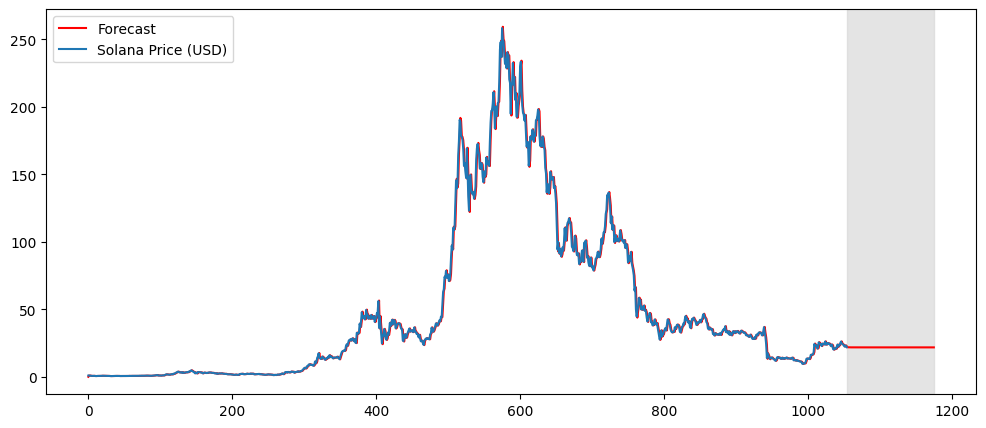

In [203]:
#df_sarima=df.copy()
df_sarima1['sarima_model'] = sarimax_best_model.fittedvalues

# forecast for entire data set = actual values in data set + future forecasted values
sarimax_forecast = sarimax_best_model.predict(start=df_sarima1.shape[0], end=df_sarima1.shape[0] + 120)
sarimax_forecast = df_sarima1['sarima_model'].append(sarimax_forecast)

plt.figure(figsize=(12, 5))
plt.plot(sarimax_forecast, color='r', label='Forecast')
plt.axvspan(df_sarima1.index[-1], sarimax_forecast.index[-1], alpha=0.6, color='lightgrey')
plt.plot(df_sarima1['y'], label='Solana Price (USD)')

plt.legend()
plt.show()

### Model 2 : Prophet

In [36]:
from fbprophet import Prophet

#choose the variable for prophet
df_prophet=df[["Date","Close"]]
df_prophet

#Requirement for prophet model - date col need to be named as ds and Y column to be named as y 
df_prophet=df_prophet.rename(columns={'Date':'ds', 'Close':'y'})
df_prophet.info()

In [58]:
#choose the variable for Sarima
df_prophet1=df_new1[["Date","ReferenceRateUSD"]]

#Rename
df_prophet1=df_prophet1.rename(columns={'Date':'ds', 'ReferenceRateUSD':'y'})
df_prophet1.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [59]:
prophet_model = Prophet(weekly_seasonality=True, daily_seasonality=True,)
#prophet_model.fit(df_prophet)
prophet_model.fit(df_prophet1)

#check weekly seasonality
print(prophet_model.weekly_seasonality)

#check daily seasonality
print(prophet_model.daily_seasonality)

Initial log joint probability = -40.1298
True
True
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2000.68     0.0336145       442.855           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2138.17     0.0250416       236.521           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2199.19    0.00404513       259.448           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2242.14     0.0780259       407.417      0.4659      0.4659      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2261.33    0.00172418       425.289      0.3809      0.3809      603   
    Iter      log prob        ||dx||      ||grad||    

In [61]:
prophet_future = prophet_model.make_future_dataframe(periods=5, freq = 'd')
prophet_future.tail()

ds
1055 2023-03-02
1056 2023-03-03
1057 2023-03-04
1058 2023-03-05
1059 2023-03-06

#### Building Prophet model

In [62]:
prophet_forecast = prophet_model.predict(prophet_future)

In [63]:
prophet_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
1055 2023-03-02  15.723045    1.824055   29.575006
1056 2023-03-03  15.394452    0.792771   29.250647
1057 2023-03-04  14.715813    1.983211   28.876099
1058 2023-03-05  15.010629    0.411964   29.285140
1059 2023-03-06  14.955289    0.423105   29.855196

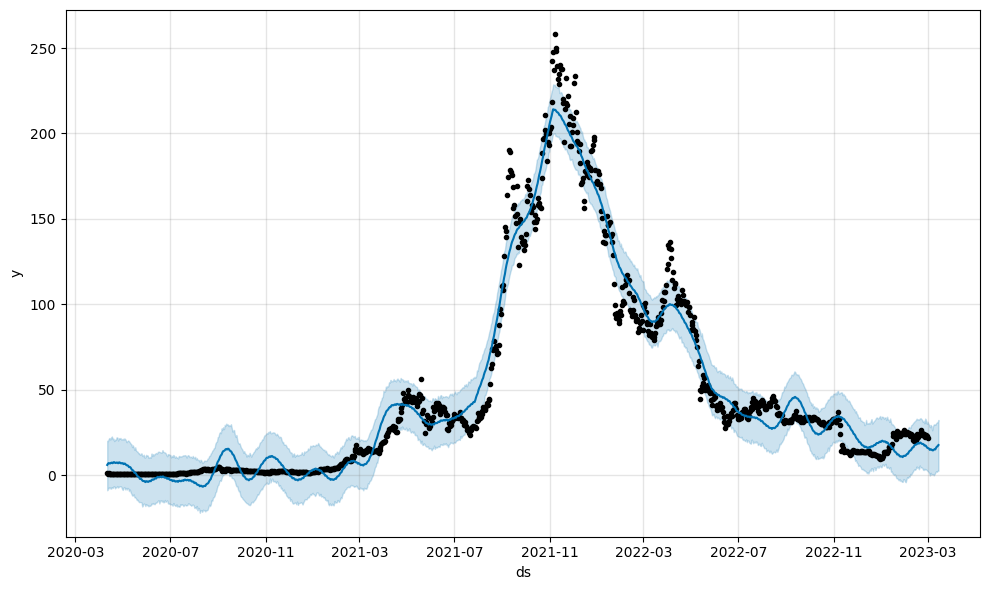

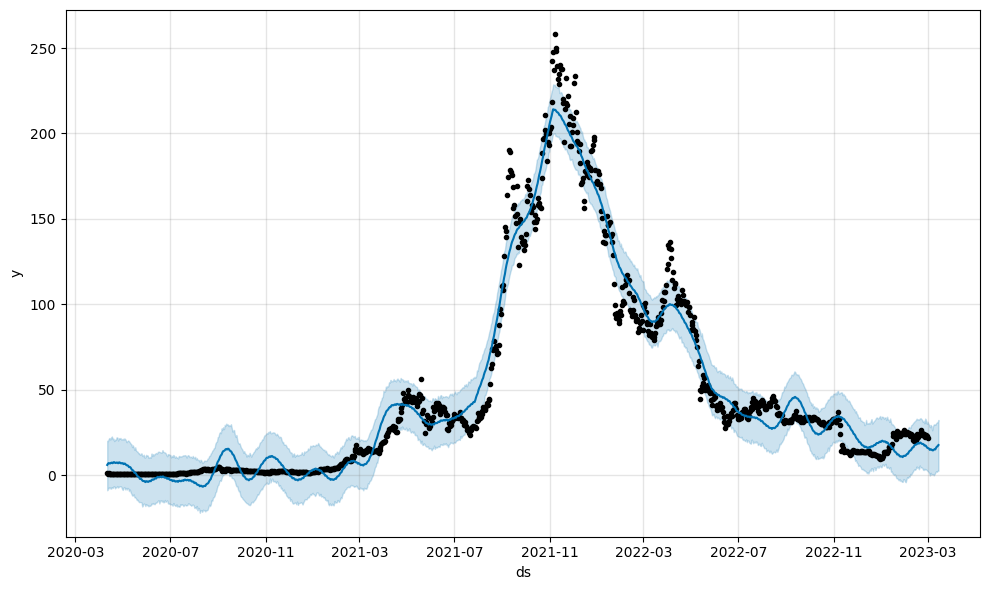

In [51]:
display(prophet_model.plot(prophet_forecast))

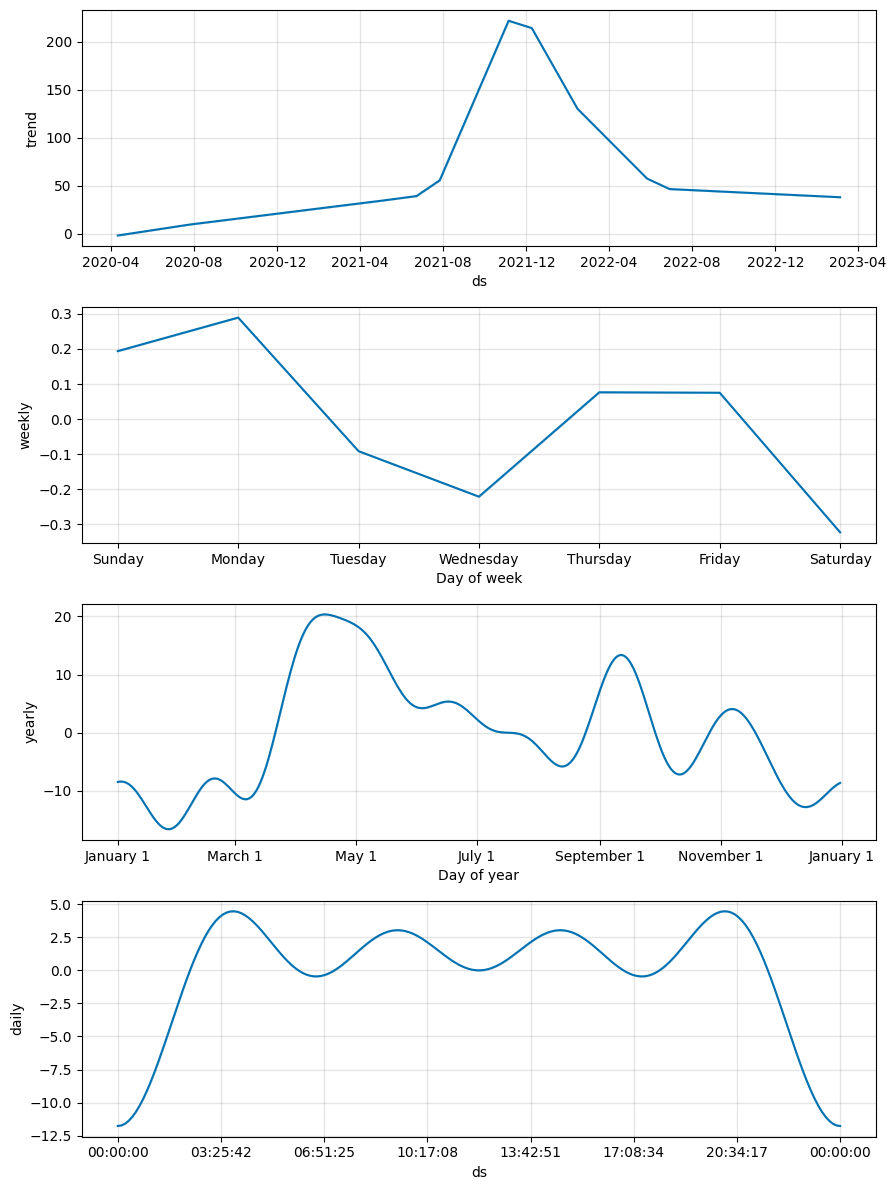

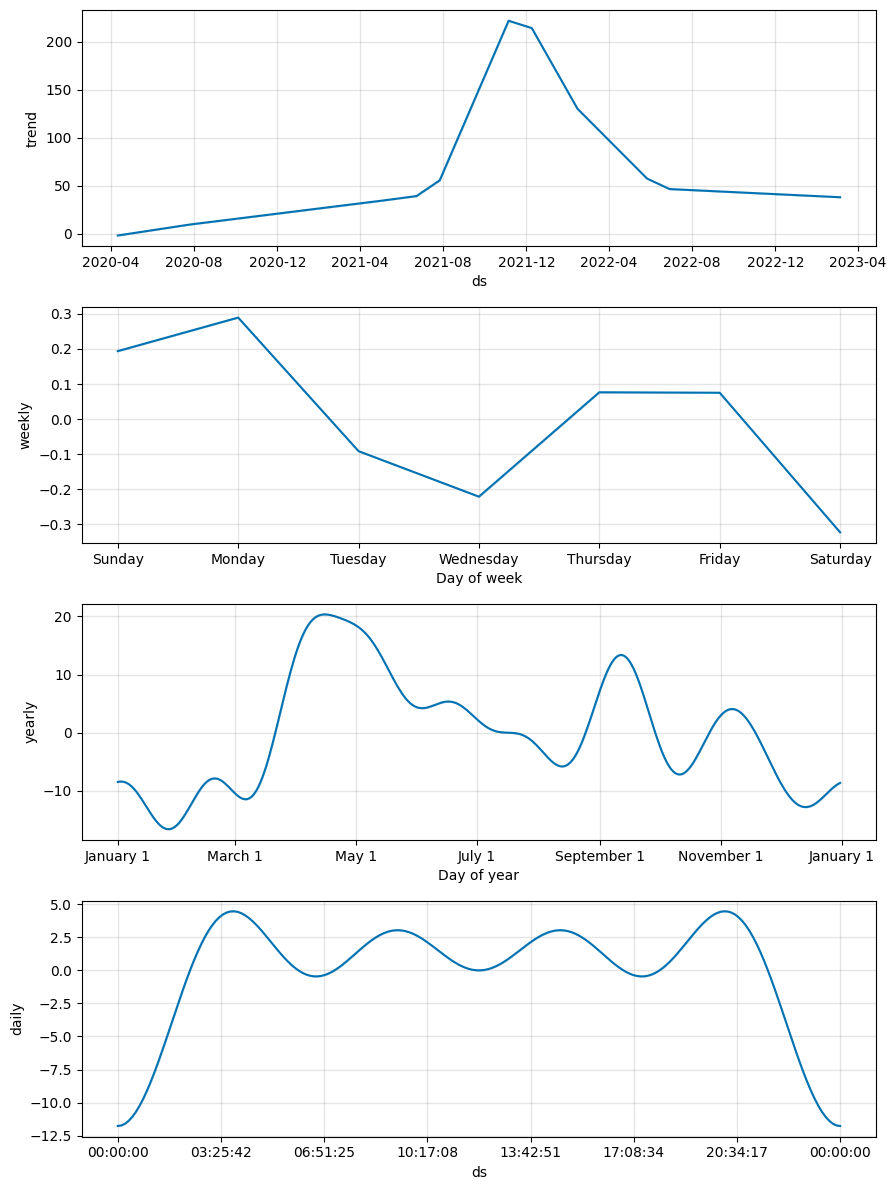

In [64]:
# decompose time series model into trend and seasonality
display(prophet_model.plot_components(prophet_forecast))

In [65]:
# add forecasted data to existing data set / data frame
#metric_prophet = prophet_forecast.set_index('ds')[['yhat']].join(df_prophet.set_index('ds').y).reset_index()
metric_prophet = prophet_forecast.set_index('ds')[['yhat']].join(df_prophet1.set_index('ds').y).reset_index()

In [66]:
#quick check on the future dates where the actual values are not available
print("Before dropping : ")
display(metric_prophet.tail())

#drop the rows of future dates where the actual values are not available
metric_prophet.dropna(inplace=True)

#quick check on the future dates where the actual values are not available
print("After dropping")
display(metric_prophet.tail())

Before dropping : 


ds       yhat   y
1055 2023-03-02  15.723045 NaN
1056 2023-03-03  15.394452 NaN
1057 2023-03-04  14.715813 NaN
1058 2023-03-05  15.010629 NaN
1059 2023-03-06  14.955289 NaN

After dropping


ds       yhat          y
1050 2023-02-25  17.197407  23.032120
1051 2023-02-26  17.351204  22.392771
1052 2023-02-27  17.065344  23.255261
1053 2023-02-28  16.296863  22.686917
1054 2023-03-01  15.786235  21.932019

In [67]:
#https://medium.com/@ottaviocalzone/mae-mse-rmse-and-f1-score-in-time-series-forecasting-d04021ffa7ce
rsquared = r2_score(metric_prophet.y, metric_prophet.yhat)
display('R-Squared: %.3f' % rsquared)

mse= mean_squared_error(metric_prophet.y, metric_prophet.yhat)
print('MSE: %.3f' % mse)

rmse = mean_squared_error(metric_prophet.y, metric_prophet.yhat, squared=False)
print('RMSE: %.3f' % rmse)

mae = mean_absolute_error(metric_prophet.y, metric_prophet.yhat)
print('MAE: %.3f' % mae)

mape = np.mean(np.abs((metric_prophet.y - metric_prophet.yhat)/metric_prophet.y))*100
print('MAPE: %.3f' % mape)

'R-Squared: 0.965'

MSE: 123.244
RMSE: 11.102
MAE: 8.269


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAPE: 113.991


## Model 3 : LSTM (Pytouch)

In [69]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [71]:
df_new1_index_date=df_new1_index_date[["ReferenceRate","ReferenceRateBTC","ReferenceRateETH",
                                       "ReferenceRateEUR","ReferenceRateUSD"]]
df_new1_index_date

ReferenceRate  ReferenceRateBTC  ReferenceRateETH  \
Date                                                            
2020-04-11       0.949557          0.000138          0.006027   
2020-04-12       0.780536          0.000113          0.004927   
2020-04-13       0.905885          0.000130          0.005639   
2020-04-14       0.784060          0.000114          0.004988   
2020-04-15       0.670645          0.000098          0.004218   
...                   ...               ...               ...   
2023-02-25      23.032120          0.000994          0.014321   
2023-02-26      22.392771          0.000967          0.014049   
2023-02-27      23.255261          0.000988          0.014175   
2023-02-28      22.686917          0.000965          0.013887   
2023-03-01      21.932019          0.000948          0.013651   

            ReferenceRateEUR  ReferenceRateUSD  
Date                                            
2020-04-11          0.869177          0.949557  
2020-04-12          0.715000          0.780536  
2020-04-13          0.830362          0.905885  
2020-04-14          0.718181          0.784060  
2020-04-15          0.611434          0.670645  
...                      ...               ...  
2023-02-25         21.847463         23.032120  
2023-02-26         21.263598         22.392771  
2023-02-27         22.048681         23.255261  
2023-02-28         21.411043         22.686917  
2023-03-01         20.759619         21.932019  

[1055 rows x 5 columns]

In [72]:
#test new dataset
X, y = df_new1_index_date.drop(columns=['ReferenceRateUSD']), df_new1_index_date.ReferenceRateUSD.values
X.shape, y.shape

((1055, 4), (1055,))

In [75]:
# X, y = df_index_date.drop(columns=['Close']), df.Close.values
# X.shape, y.shape

In [76]:
# split a multivariate sequence past, future samples (X and y)
def split_sequences(input_sequences, output_sequence, n_steps_in, n_steps_out):
    X, y = list(), list() # instantiate X and y
    for i in range(len(input_sequences)):
        # find the end of the input, output sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(input_sequences): break
        # gather input and output of the pattern
        seq_x, seq_y = input_sequences[i:end_ix], output_sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x), y.append(seq_y)
    return np.array(X), np.array(y)

In [77]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X_trans = ss.fit_transform(X)
y_trans = mm.fit_transform(y.reshape(-1, 1))
#https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape

In [78]:
X_ss, y_mm = split_sequences(X_trans, y_trans, 100, 50)
print(X_ss.shape, y_mm.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(907, 100, 4) (907, 50)


In [79]:
assert y_mm[0].all() == y_trans[99:149].squeeze(1).all()
y_mm[0]

array([0.0017533 , 0.00157985, 0.00138491, 0.0017881 , 0.00203807,
       0.00209965, 0.00186162, 0.00296079, 0.00420839, 0.00485562,
       0.00492635, 0.00437653, 0.00454626, 0.00398118, 0.00395606,
       0.00470303, 0.00497564, 0.00538718, 0.00486201, 0.00656314,
       0.0060313 , 0.00759137, 0.00838389, 0.01017186, 0.01062978,
       0.01250173, 0.01255676, 0.01119101, 0.01039995, 0.01108419,
       0.01011222, 0.01100029, 0.00922628, 0.01044137, 0.00943595,
       0.00973688, 0.01080728, 0.01084151, 0.01055054, 0.01176536,
       0.01125419, 0.01351406, 0.01351358, 0.01521929, 0.01661475,
       0.01505355, 0.0140344 , 0.01180526, 0.01173933, 0.00801121])

In [152]:
total_samples = len(X)
train_test_cutoff = round(0.70 * total_samples)

X_train = X_ss[:-150]
X_test = X_ss[-150:]

y_train = y_mm[:-150]
y_test = y_mm[-150:] 

print("Training Shape:", X_train.shape, y_train.shape)
print("Testing Shape:", X_test.shape, y_test.shape) 

Training Shape: (757, 100, 4) (757, 50)
Testing Shape: (150, 100, 4) (150, 50)


In [154]:
seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [155]:
# convert to pytorch tensors
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

In [156]:
# reshaping to rows, timestamps, features
X_train_tensors_final = torch.reshape(X_train_tensors,   
                                      (X_train_tensors.shape[0], 100, 
                                       X_train_tensors.shape[2]))
X_test_tensors_final = torch.reshape(X_test_tensors,  
                                     (X_test_tensors.shape[0], 100, 
                                      X_test_tensors.shape[2])) 

print("Training Shape:", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape:", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape: torch.Size([757, 100, 4]) torch.Size([757, 50])
Testing Shape: torch.Size([150, 100, 4]) torch.Size([150, 50])


In [157]:
X_check, y_check = split_sequences(X, y.reshape(-1, 1), 100, 50)
X_check[-1][0:4]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[3.30096475e+01, 1.68129782e-03, 2.49240401e-02, 3.35704966e+01],
       [3.40926789e+01, 1.67614194e-03, 2.50158346e-02, 3.41577575e+01],
       [3.40244684e+01, 1.68813198e-03, 2.51556594e-02, 3.43610690e+01],
       [3.33476160e+01, 1.67151380e-03, 2.46771922e-02, 3.40556038e+01]])

In [158]:
y_check[-1]

array([16.21794347, 16.36569672, 16.59832096, 18.23009072, 24.33579269,
       22.86628434, 23.60884293, 23.0164054 , 20.90162419, 21.39191869,
       25.51468872, 24.70520319, 24.24531682, 24.37655927, 22.78141882,
       24.56490414, 24.33800405, 24.35042448, 23.92847051, 26.15801285,
       23.92372926, 23.93443691, 24.9992269 , 24.33928567, 24.70882406,
       24.42017425, 23.52189453, 22.68082808, 23.87905454, 23.2088514 ,
       20.48878132, 20.15864515, 20.82757493, 21.47369074, 20.7641245 ,
       21.82182731, 23.83326588, 22.30896074, 23.1587177 , 23.48550202,
       24.95288737, 26.09859483, 24.87693121, 24.17829544, 23.86950441,
       23.03211976, 22.3927707 , 23.25526084, 22.686917  , 21.9320191 ])

In [159]:
df.Close.values[-50:]

array([33.4626503 , 32.33536148, 33.8805542 , 32.7501297 , 33.2354393 ,
       33.9524498 , 33.21244431, 32.46939468, 32.05569839, 32.96762085,
       34.12247086, 34.07388306, 33.34281921, 33.00146484, 32.57793427,
       32.91388321, 31.97083473, 30.77686882, 31.16548538, 30.54451942,
       30.00741768, 29.5753479 , 30.16884041, 31.2248764 , 30.16433144,
       28.9007988 , 28.08509636, 28.10867691, 28.01386261, 29.27007103,
       28.31006432, 30.93997574, 31.28472137, 30.63062477, 32.11126328,
       32.85712814, 32.96593094, 32.61103821, 32.24842453, 30.7880764 ,
       30.8438797 , 33.78085327, 36.76576233, 32.68358231, 29.60134506,
       24.15293694, 13.94085693, 17.68140793, 16.32674599, 15.40851307])

In [160]:
X.iloc[-149:-145]

ReferenceRate  ReferenceRateBTC  ReferenceRateETH  \
Date                                                            
2022-10-04      33.009647          0.001681          0.024924   
2022-10-05      34.092679          0.001676          0.025016   
2022-10-06      34.024468          0.001688          0.025156   
2022-10-07      33.347616          0.001672          0.024677   

            ReferenceRateEUR  
Date                          
2022-10-04         33.570497  
2022-10-05         34.157757  
2022-10-06         34.361069  
2022-10-07         34.055604

In [161]:
class LSTM(nn.Module):
    
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super().__init__()
        self.num_classes = num_classes # output size
        self.num_layers = num_layers # number of recurrent layers in the lstm
        self.input_size = input_size # input size
        self.hidden_size = hidden_size # neurons in each lstm layer
        # LSTM model
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=0.2) # lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) # fully connected 
        self.fc_2 = nn.Linear(128, num_classes) # fully connected last layer
        self.relu = nn.ReLU()
        
    def forward(self,x):
        # hidden state
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        # cell state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        # propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) # (input, hidden, and internal state)
        hn = hn.view(-1, self.hidden_size) # reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) # first dense
        out = self.relu(out) # relu
        out = self.fc_2(out) # final output
        return out

In [230]:
def training_loop(n_epochs, lstm, optimiser, loss_fn, X_train, y_train,
                  X_test, y_test):
    for epoch in range(n_epochs):
        lstm.train()
        outputs = lstm.forward(X_train) # forward pass
        optimiser.zero_grad() # calculate the gradient, manually setting to 0
        # obtain the loss function
        loss = loss_fn(outputs, y_train)
        loss.backward() # calculates the loss of the loss function
        optimiser.step() # improve from loss, i.e backprop
        # test loss
        lstm.eval()
        test_preds = lstm(X_test)
        test_loss = loss_fn(test_preds, y_test)
        
        if epoch % 1000 == 0:
            print("Epoch: %d, train loss: %1.5f, test loss: %1.5f, accuracy score :%1.5f " % (epoch, 
                                                                      loss.item(), 
                                                                      test_loss.item())) 


In [239]:
def training_loop(n_epochs, lstm, optimiser, loss_fn, X_train, y_train,X_test, y_test):
    for epoch in range(n_epochs):
        lstm.train()
        outputs = lstm.forward(X_train) # forward pass
        optimiser.zero_grad() # calculate the gradient, manually setting to 0
        # obtain the loss function
        loss = loss_fn(outputs, y_train)
        loss.backward() # calculates the loss of the loss function
        optimiser.step() # improve from loss, i.e backprop
        # test loss
        lstm.eval()
        test_preds = lstm(X_test)
        test_loss = loss_fn(test_preds, y_test)
        
        
        if epoch % 1000 == 0:
            print("Epoch: %d, train loss: %1.5f, test loss: %1.5f " % (epoch, 
                                                                      loss.item(), 
                                                                      test_loss.item())) 

In [240]:
import warnings
warnings.filterwarnings('ignore')

n_epochs = 10000 # 10000 epochs
learning_rate = 0.001 # 0.001 lr

input_size = 4 # number of features
hidden_size = 2 # number of features in hidden state
num_layers = 1 # number of stacked lstm layers

num_classes = 50 # number of output classes 

lstm = LSTM(num_classes, 
              input_size, 
              hidden_size, 
              num_layers)

In [241]:
loss_fn = torch.nn.MSELoss()
optimiser = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

In [242]:
%%time
training_loop(n_epochs=n_epochs,
              lstm=lstm,
              optimiser=optimiser,
              loss_fn=loss_fn,
              X_train=X_train_tensors_final,
              y_train=y_train_tensors,
              X_test=X_test_tensors_final,
              y_test=y_test_tensors)

Epoch: 0, train loss: 0.14175, test loss: 0.02836 
Epoch: 1000, train loss: 0.00811, test loss: 0.00502 
Epoch: 2000, train loss: 0.00604, test loss: 0.00223 
Epoch: 3000, train loss: 0.00490, test loss: 0.00410 
Epoch: 4000, train loss: 0.00419, test loss: 0.00523 
Epoch: 5000, train loss: 0.00369, test loss: 0.00484 
Epoch: 6000, train loss: 0.00331, test loss: 0.00454 
Epoch: 7000, train loss: 0.00315, test loss: 0.00499 
Epoch: 8000, train loss: 0.00303, test loss: 0.00504 
Epoch: 9000, train loss: 0.00294, test loss: 0.00520 
CPU times: user 5min 20s, sys: 15 s, total: 5min 35s
Wall time: 5min 23s


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

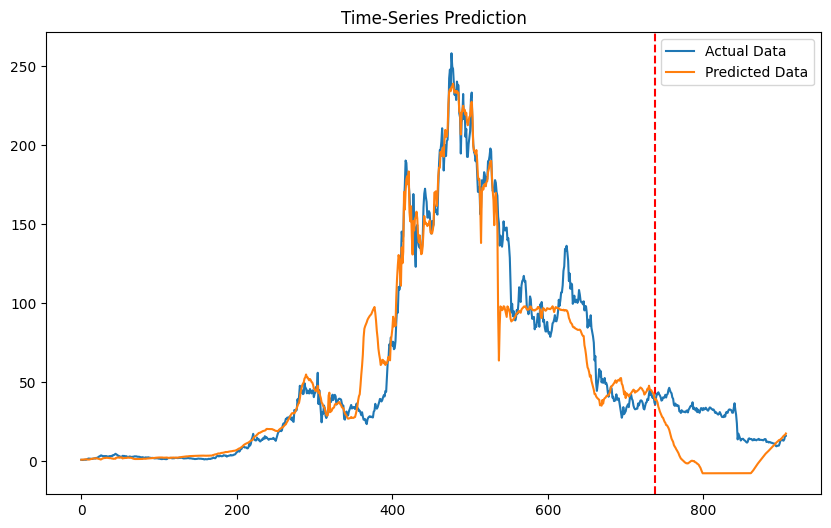

In [221]:
# df_X_ss = ss.transform(df_index_date.drop(columns=['Close'])) # old transformers
# df_y_mm = mm.transform(df_index_date.Close.values.reshape(-1, 1)) # old transformers


df_X_ss = ss.transform(df_new1_index_date.drop(columns=['ReferenceRateUSD'])) # old transformers
df_y_mm = mm.transform(df_new1_index_date.ReferenceRateUSD.values.reshape(-1, 1)) # old transformers


# split the sequence
df_X_ss, df_y_mm = split_sequences(df_X_ss, df_y_mm, 100, 50)
# converting to tensors
df_X_ss = Variable(torch.Tensor(df_X_ss))
df_y_mm = Variable(torch.Tensor(df_y_mm))
# reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 100, df_X_ss.shape[2]))

train_predict = lstm(df_X_ss) # forward pass
data_predict = train_predict.data.numpy() # numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) # reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
true, preds = [], []
for i in range(len(dataY_plot)):
    true.append(dataY_plot[i][0])
for i in range(len(data_predict)):
    preds.append(data_predict[i][0])
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=train_test_cutoff, c='r', linestyle='--') # size of the training set

plt.plot(true, label='Actual Data') # actual plot
plt.plot(preds, label='Predicted Data') # predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.savefig("../02-Saved_EDA/whole_plot.png", dpi=300)
plt.show() 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

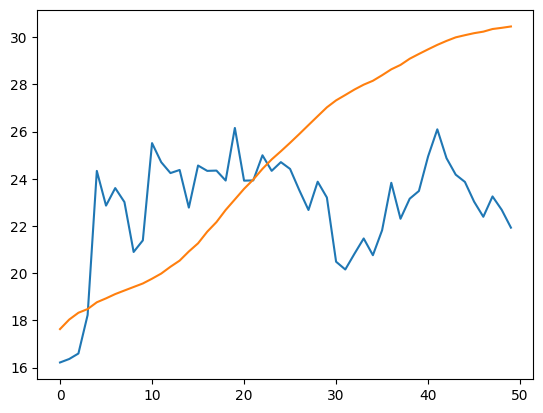

In [222]:
test_predict = lstm(X_test_tensors_final[-1].unsqueeze(0)) # get the last sample
test_predict = test_predict.detach().numpy()
test_predict = mm.inverse_transform(test_predict)
test_predict = test_predict[0].tolist()

test_target = y_test_tensors[-1].detach().numpy() # last sample again
test_target = mm.inverse_transform(test_target.reshape(1, -1))
test_target = test_target[0].tolist()

plt.plot(test_target, label="Actual Data")
plt.plot(test_predict, label="LSTM Predictions")
plt.savefig("../02-Saved_EDA/small_plot.png", dpi=300)
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

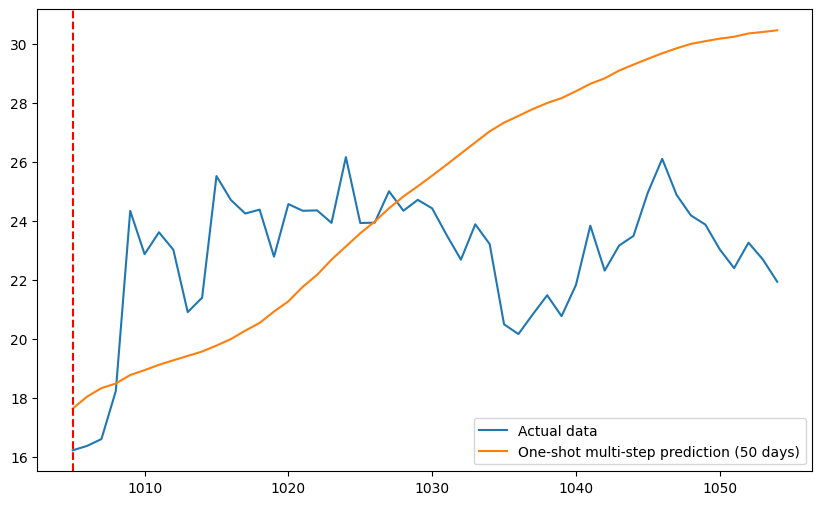

In [223]:
plt.figure(figsize=(10,6)) #plotting
a = [x for x in range(1005, len(y))]
plt.plot(a, y[1005:], label='Actual data');
c = [x for x in range(len(y)-50, len(y))]
plt.plot(c, test_predict, label='One-shot multi-step prediction (50 days)')
plt.axvline(x=len(y)-50, c='r', linestyle='--')
plt.legend()
plt.show()

In [ ]:
#https://charlieoneill.medium.com/predicting-the-price-of-bitcoin-with-multivariate-pytorch-lstms-695bc294130

In [204]:
def accuracy_score(y_true, y_pred):
    y_pred = np.concatenate(tuple(y_pred))
    y_true = np.concatenate(tuple([[t for t in y] for y in y_true])).reshape(y_pred.shape)
    return (y_true == y_pred).sum() / float(len(y_true))

In [206]:
print(accuracy_score(test_target, test_predict))

<IPython.core.display.Javascript object>

ValueError: zero-dimensional arrays cannot be concatenated